# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
#以"YEARS_BIRTH"分成4組, 把組別儲存在"AGE_BINS"
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365
app_train['AGE_BINS'] = pd.cut(app_train['YEARS_BIRTH'], 4)
app_train['AGE_BINS'].value_counts().sort_index()

(20.469, 32.668]     66536
(32.668, 44.819]    100808
(44.819, 56.97]      84685
(56.97, 69.121]      55482
Name: AGE_BINS, dtype: int64

In [6]:
#把"AGE_BINS"的4個組別排序
age_group_sorted = app_train['AGE_BINS'].unique().sort_values()
age_group_sorted

[(20.469, 32.668], (32.668, 44.819], (44.819, 56.97], (56.97, 69.121]]
Categories (4, interval[float64]): [(20.469, 32.668] < (32.668, 44.819] < (44.819, 56.97] < (56.97, 69.121]]

In [7]:
app_train.groupby('AGE_BINS')['TARGET'].mean()

AGE_BINS
(20.469, 32.668]    0.111534
(32.668, 44.819]    0.087067
(44.819, 56.97]     0.068454
(56.97, 69.121]     0.051008
Name: TARGET, dtype: float64

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Text(0,0.5,'Rate of Failure to Repay')

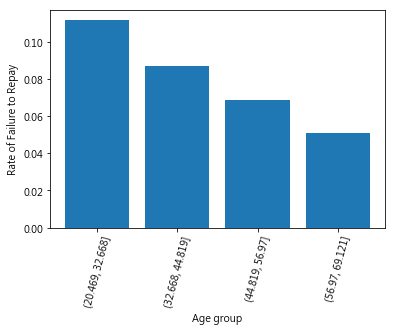

In [9]:
# 以"年齡"分組, 畫圖來觀察 "TARGET"

x = age_group_sorted.astype(str)
y = app_train.groupby('AGE_BINS')['TARGET'].mean().values

print(type(x), type(y))
#app_train.boxplot(y)
plt.bar(x,y)
plt.xticks(rotation=75)
plt.xlabel('Age group')
plt.ylabel('Rate of Failure to Repay')

In [13]:
# 以"年齡" 和 "TARGET"分組, 畫圖來觀察 "DAYS_EMPLOYED" 與目標值 ('TARGET') 的關係

app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])

tgt_corr = app_train.corr()['TARGET'].sort_values()
tgt_corr[:10]

EXT_SOURCE_3         -0.178919
EXT_SOURCE_2         -0.160472
EXT_SOURCE_1         -0.155317
YEARS_BIRTH          -0.078239
DAYS_BIRTH           -0.078239
DAYS_EMPLOYED        -0.074958
DAYS_EMPLOYED_ANOM   -0.045987
FLOORSMAX_AVG        -0.044003
FLOORSMAX_MEDI       -0.043768
FLOORSMAX_MODE       -0.043226
Name: TARGET, dtype: float64

In [14]:
#以['AGE_BINS','TARGET']來分組, 產生list作為長條圖中各組別的 xticks, y則是平均的'DAYS_EMPLOYED'
x = [age_bin+str(tgt) for age_bin in age_group_sorted.astype(str) for tgt in range(2)]
y = app_train.groupby(['AGE_BINS','TARGET'])['DAYS_EMPLOYED'].mean()
print(x)
print(y)

['(20.469, 32.668]0', '(20.469, 32.668]1', '(32.668, 44.819]0', '(32.668, 44.819]1', '(44.819, 56.97]0', '(44.819, 56.97]1', '(56.97, 69.121]0', '(56.97, 69.121]1']
AGE_BINS          TARGET
(20.469, 32.668]  0         1343.832029
                  1         1187.229666
(32.668, 44.819]  0         2360.952883
                  1         1882.564791
(44.819, 56.97]   0         3193.549034
                  1         2460.317376
(56.97, 69.121]   0         4048.190768
                  1         2928.698276
Name: DAYS_EMPLOYED, dtype: float64


Text(0.5,1,'Average DAYS_EMPLOYED (Group by Age and Target) ')

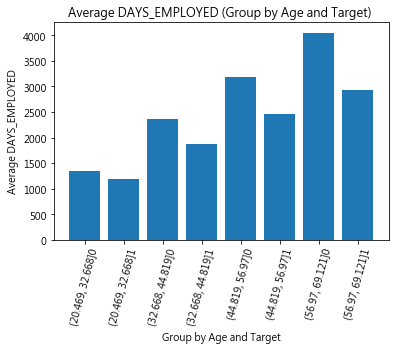

In [15]:
#不同年齡的各組, 會準時還貸者(TARGET=0)的平均'DAYS_EMPLOYED' 都比不會準時還貸者(TARGET=1)較大
plt.bar(x,y.values)
plt.xticks(rotation=75)
plt.xlabel('Group by Age and Target')
plt.ylabel('Average DAYS_EMPLOYED')
plt.title('Average DAYS_EMPLOYED (Group by Age and Target) ')

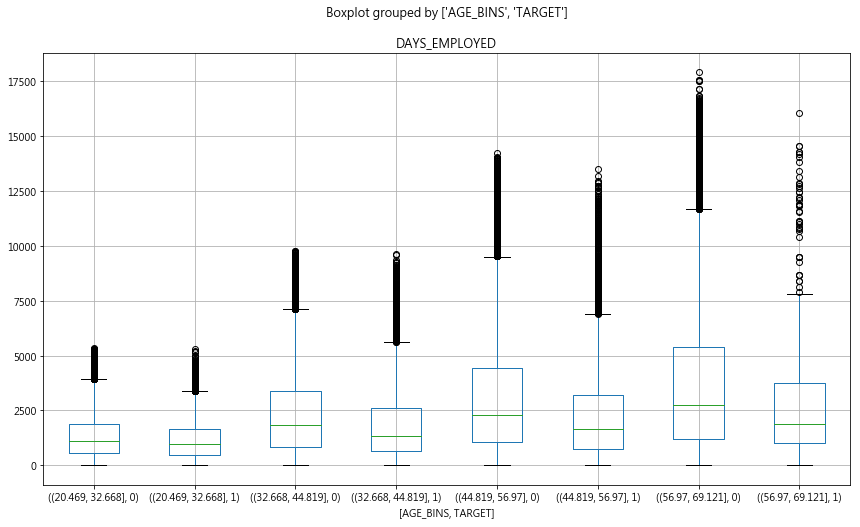

In [17]:
app_train.boxplot(column='DAYS_EMPLOYED', by=['AGE_BINS','TARGET'], figsize=(14,8))